In [1]:
!nvidia-smi

Mon Mar 22 02:03:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/data.zip 

Archive:  /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/data.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!pip3 install wandb

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPool2D,Dense,Flatten
from tensorflow.keras.activations import *
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy

In [5]:
train_dir = "./data/Train/"
test_dir = "./data/Test/"
valid_dir = "./data/Validation/"

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,zoom_range=0.25,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.0,zoom_range=0.35,horizontal_flip=True,vertical_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [7]:
import matplotlib.image as mpimg
def view_random_img(class_name,directory):
  img = mpimg.imread(directory + random.choice(os.listdir(directory)))
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(class_name)
  img = mpimg.imread(directory + random.choice(os.listdir(directory)))
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(class_name)

In [8]:
len(os.listdir(train_dir + '/Mask'))

300

In [9]:
len(os.listdir(train_dir + '/Non Mask'))

300

In [10]:
len(os.listdir(test_dir + '/Mask'))

50

In [11]:
len(os.listdir(test_dir + '/Non Mask'))

50

In [12]:
len(os.listdir(valid_dir + '/Mask'))

153

In [13]:
len(os.listdir(valid_dir + '/Non Mask'))

153

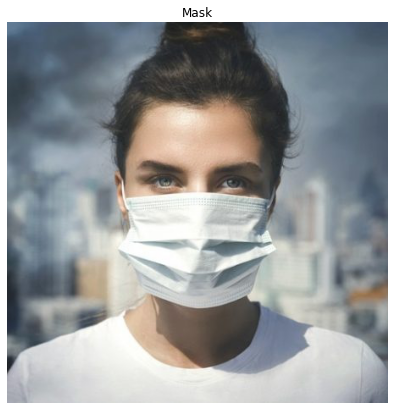

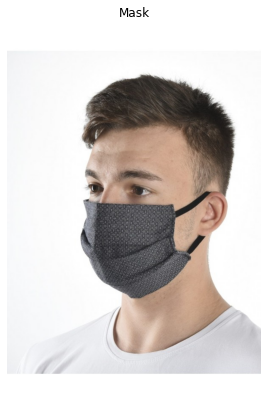

In [14]:
view_random_img('Mask','./data/Train/Mask/')

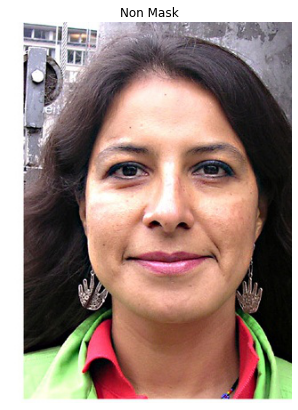

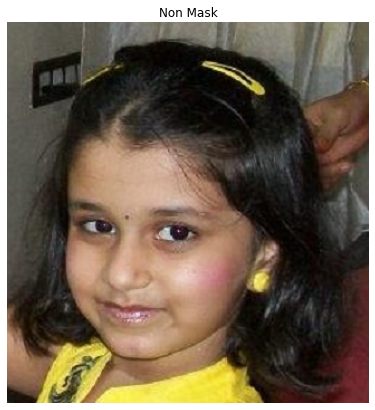

In [15]:
view_random_img('Non Mask','./data/Train/Non Mask/')

In [16]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='binary')
valid_data = valid_datagen.flow_from_directory(valid_dir,target_size=(224,224),class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project='mask-detection')
model_0 = Sequential(
    [
     Conv2D(10,3,padding='same',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,3,padding='same',activation=relu),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='same'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model_0.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model_0.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

In [21]:
model_0.evaluate(test_data)

4/4 [==============================] - 2s 431ms/step - loss: 0.3448 - accuracy: 0.8600


[0.34483322501182556, 0.8600000143051147]

In [23]:
model_0.save('/content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/model_0.h5')

In [24]:
wandb.init(project='mask-detection',name='1')
model_1 = Sequential(
    [
     Conv2D(10,3,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,3,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model_1.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model_1.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

epoch,14
loss,0.35436
accuracy,0.86
val_loss,0.31739
val_accuracy,0.86275
_runtime,221
_timestamp,1616379233
_step,14
best_val_loss,0.26845
best_epoch,9


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,██▆▄▄▃▃▂▃▂▁▂▁▁▁
accuracy,▁▃▅▆▆▇▇▇▇▇█████
val_loss,██▆▄▃▃▃▂▂▁▁▁▂▂▂
val_accuracy,▁▂▅▆▇▇▇▇██████▇
_runtime,▁▂▂▃▃▄▄▅▅▆▆▇▇██
_timestamp,▁▂▂▃▃▄▄▅▅▆▆▇▇██
_step,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█


Epoch 1/100
19/19 [==============================] - 16s 816ms/step - loss: 0.6916 - accuracy: 0.5368 - val_loss: 0.6829 - val_accuracy: 0.5850
Epoch 2/100
19/19 [==============================] - 15s 780ms/step - loss: 0.6855 - accuracy: 0.5554 - val_loss: 0.6494 - val_accuracy: 0.8039
Epoch 3/100
19/19 [==============================] - 15s 783ms/step - loss: 0.6433 - accuracy: 0.6558 - val_loss: 0.4384 - val_accuracy: 0.8595
Epoch 4/100
19/19 [==============================] - 15s 783ms/step - loss: 0.5132 - accuracy: 0.7704 - val_loss: 0.3863 - val_accuracy: 0.8301
Epoch 5/100
19/19 [==============================] - 15s 781ms/step - loss: 0.4968 - accuracy: 0.7689 - val_loss: 0.3669 - val_accuracy: 0.8333
Epoch 6/100
19/19 [==============================] - 15s 783ms/step - loss: 0.4523 - accuracy: 0.7889 - val_loss: 0.3606 - val_accuracy: 0.8333
Epoch 7/100
19/19 [==============================] - 15s 779ms/step - loss: 0.4285 - accuracy: 0.8173 - val_loss: 0.3339 - val_accuracy:

In [25]:
model_1.evaluate(test_data)
model_1.save('/content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/model_1.h5')

4/4 [==============================] - 2s 452ms/step - loss: 0.3644 - accuracy: 0.8500


In [58]:
class_names = ['Mask','Non Mask']

In [ ]:
wandb.init(project='mask-detection',name='2')
model_2 = Sequential(
    [
     Conv2D(64,3,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(64,3,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(64,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(64,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(64,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(64,3,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model_2.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model_2.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

In [27]:
model_2.evaluate(test_data)
model_2.save('/content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/model_2.h5')

4/4 [==============================] - 2s 592ms/step - loss: 0.3319 - accuracy: 0.8600


In [ ]:
wandb.init(project='mask-detection',name='3')
model_3 = Sequential(
    [
     Conv2D(10,3,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,3,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,3,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model_3.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model_3.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

In [ ]:
model_3.evaluate(test_data)
model_3.save('/content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/model_3.h5')

In [32]:
# Conv2D Filters = 64

In [33]:
wandb.init(project='mask-detection',name='-')
model = Sequential(
    [
     Conv2D(128,3,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(128,3,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

epoch,9
loss,0.45203
accuracy,0.79167
val_loss,0.39228
val_accuracy,0.8366
_runtime,149
_timestamp,1616380606
_step,9
best_val_loss,0.35226
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▂▂▃▂▁▃▁
accuracy,▁▅▆█▇▇██▇█
val_loss,█▅▄▂▁▂▁▁▃▂
val_accuracy,▁▄▅▇█▇█▇▆▇
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/100
19/19 [==============================] - 22s 1s/step - loss: 0.7046 - accuracy: 0.5312 - val_loss: 0.6409 - val_accuracy: 0.8203
Epoch 2/100
19/19 [==============================] - 15s 820ms/step - loss: 0.6060 - accuracy: 0.7087 - val_loss: 0.3761 - val_accuracy: 0.8399
Epoch 3/100
19/19 [==============================] - 16s 824ms/step - loss: 0.5349 - accuracy: 0.7526 - val_loss: 0.5981 - val_accuracy: 0.6634
Epoch 4/100
19/19 [==============================] - 16s 827ms/step - loss: 0.5523 - accuracy: 0.7374 - val_loss: 0.4147 - val_accuracy: 0.8399
Epoch 5/100
19/19 [==============================] - 15s 818ms/step - loss: 0.4680 - accuracy: 0.7649 - val_loss: 0.4546 - val_accuracy: 0.7582
Epoch 6/100
19/19 [==============================] - 16s 832ms/step - loss: 0.4612 - accuracy: 0.7828 - val_loss: 0.3758 - val_accuracy: 0.8399
Epoch 7/100
19/19 [==============================] - 15s 819ms/step - loss: 0.4288 - accuracy: 0.8070 - val_loss: 0.4726 - val_accuracy: 0.

In [46]:
wandb.init(project='mask-detection',name='valid')
model = Sequential(
    [
     Conv2D(10,4,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,4,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

Epoch 1/100
19/19 [==============================] - 15s 796ms/step - loss: 0.6941 - accuracy: 0.5183 - val_loss: 0.6810 - val_accuracy: 0.6797
Epoch 2/100
19/19 [==============================] - 14s 773ms/step - loss: 0.6781 - accuracy: 0.5762 - val_loss: 0.6049 - val_accuracy: 0.8170
Epoch 3/100
19/19 [==============================] - 15s 779ms/step - loss: 0.6437 - accuracy: 0.6779 - val_loss: 0.5888 - val_accuracy: 0.7124
Epoch 4/100
19/19 [==============================] - 15s 785ms/step - loss: 0.5692 - accuracy: 0.7068 - val_loss: 0.4447 - val_accuracy: 0.8105
Epoch 5/100
19/19 [==============================] - 14s 775ms/step - loss: 0.4881 - accuracy: 0.7735 - val_loss: 0.3438 - val_accuracy: 0.8725
Epoch 6/100
19/19 [==============================] - 14s 774ms/step - loss: 0.4260 - accuracy: 0.8246 - val_loss: 0.3360 - val_accuracy: 0.8497
Epoch 7/100
19/19 [==============================] - 14s 773ms/step - loss: 0.4382 - accuracy: 0.8057 - val_loss: 0.2975 - val_accuracy:

In [47]:
wandb.init(project='mask-detection',name='valid')
model = Sequential(
    [
     Conv2D(10,4,padding='same',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,4,padding='same',activation=relu),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='same'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

epoch,16
loss,0.34935
accuracy,0.845
val_loss,0.30974
val_accuracy,0.87255
_runtime,251
_timestamp,1616382434
_step,16
best_val_loss,0.28687
best_epoch,11


epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
loss,██▇▆▄▃▃▂▃▂▂▁▂▂▁▁▁
accuracy,▁▃▄▅▇▇▇▇▇▇▇█▇▇███
val_loss,█▇▆▄▂▂▁▁▃▁▂▁▂▂▂▁▁
val_accuracy,▁▅▂▅▇▆▇▇▅▇▇▇▆▇▆█▇
_runtime,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
_timestamp,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██


Epoch 1/100
19/19 [==============================] - 16s 799ms/step - loss: 0.6907 - accuracy: 0.4995 - val_loss: 0.6925 - val_accuracy: 0.4673
Epoch 2/100
19/19 [==============================] - 15s 779ms/step - loss: 0.6884 - accuracy: 0.5527 - val_loss: 0.7047 - val_accuracy: 0.4608
Epoch 3/100
19/19 [==============================] - 15s 779ms/step - loss: 0.6591 - accuracy: 0.6192 - val_loss: 0.6914 - val_accuracy: 0.5588
Epoch 4/100
19/19 [==============================] - 15s 773ms/step - loss: 0.6323 - accuracy: 0.6812 - val_loss: 0.5748 - val_accuracy: 0.6732
Epoch 5/100
19/19 [==============================] - 14s 772ms/step - loss: 0.5553 - accuracy: 0.7152 - val_loss: 0.4898 - val_accuracy: 0.7680
Epoch 6/100
19/19 [==============================] - 15s 777ms/step - loss: 0.4901 - accuracy: 0.7489 - val_loss: 0.4853 - val_accuracy: 0.7582
Epoch 7/100
19/19 [==============================] - 15s 775ms/step - loss: 0.4559 - accuracy: 0.7775 - val_loss: 0.4055 - val_accuracy:

In [ ]:
wandb.init(project='mask-detection',name='-')
model = Sequential(
    [
     Conv2D(10,4,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,4,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

In [48]:
wandb.init(project='mask-detection',name='lr=0.001')
model = Sequential(
    [
     Conv2D(10,4,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,4,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.001))
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

epoch,22
loss,0.32758
accuracy,0.865
val_loss,0.28555
val_accuracy,0.88235
_runtime,339
_timestamp,1616382777
_step,22
best_val_loss,0.27156
best_epoch,17


epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
loss,███▇▅▄▄▃▃▃▂▃▂▂▂▂▂▂▂▂▁▁▁
accuracy,▁▂▃▄▅▆▇▇▆▇█▇█▇▇▇▇▇█████
val_loss,███▆▅▄▃▄▂▂▂▂▂▂▂▁▁▁▂▁▁▂▁
val_accuracy,▁▁▃▄▆▆▇▆████▇▇▇██████▇█
_runtime,▁▁▂▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▇▇▇██
_timestamp,▁▁▂▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▇▇▇██
_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██


Epoch 1/100
19/19 [==============================] - 16s 812ms/step - loss: 0.6952 - accuracy: 0.4918 - val_loss: 0.6914 - val_accuracy: 0.5033
Epoch 2/100
19/19 [==============================] - 15s 782ms/step - loss: 0.6872 - accuracy: 0.5340 - val_loss: 0.6740 - val_accuracy: 0.6667
Epoch 3/100
19/19 [==============================] - 15s 774ms/step - loss: 0.6571 - accuracy: 0.6776 - val_loss: 0.6474 - val_accuracy: 0.5948
Epoch 4/100
19/19 [==============================] - 15s 780ms/step - loss: 0.6287 - accuracy: 0.6396 - val_loss: 0.6271 - val_accuracy: 0.6438
Epoch 5/100
19/19 [==============================] - 15s 779ms/step - loss: 0.5480 - accuracy: 0.7556 - val_loss: 0.5057 - val_accuracy: 0.7484
Epoch 6/100
19/19 [==============================] - 15s 787ms/step - loss: 0.5191 - accuracy: 0.7619 - val_loss: 0.4815 - val_accuracy: 0.7810
Epoch 7/100
19/19 [==============================] - 14s 776ms/step - loss: 0.4276 - accuracy: 0.8186 - val_loss: 0.3744 - val_accuracy:

In [49]:
wandb.init(project='mask-detection',name='lr=0.01')
model = Sequential(
    [
     Conv2D(10,4,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,4,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.01))
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

epoch,20
loss,0.34315
accuracy,0.86833
val_loss,0.29178
val_accuracy,0.89869
_runtime,310
_timestamp,1616383274
_step,20
best_val_loss,0.2878
best_epoch,15


epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
loss,██▇▇▅▄▃▄▃▃▃▂▂▁▂▁▁▂▁▁▁
accuracy,▁▂▄▄▆▆▇▆▇▇▇██████▇███
val_loss,██▇▇▅▄▃▄▃▄▂▂▁▁▁▁▃▁▂▃▁
val_accuracy,▁▄▃▃▅▆▇▇▇▆▇█████▆█▇▆█
_runtime,▁▁▂▂▂▃▃▃▄▄▄▅▅▆▆▆▇▇▇██
_timestamp,▁▁▂▂▂▃▃▃▄▄▄▅▅▆▆▆▇▇▇██
_step,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██


Epoch 1/100
19/19 [==============================] - 16s 830ms/step - loss: 0.7035 - accuracy: 0.4823 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 15s 779ms/step - loss: 0.6862 - accuracy: 0.5529 - val_loss: 0.6994 - val_accuracy: 0.4935
Epoch 3/100
19/19 [==============================] - 15s 779ms/step - loss: 0.7068 - accuracy: 0.4578 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 4/100
19/19 [==============================] - 15s 779ms/step - loss: 0.6961 - accuracy: 0.4871 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/100
19/19 [==============================] - 15s 779ms/step - loss: 0.6932 - accuracy: 0.5058 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 15s 781ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
19/19 [==============================] - 15s 785ms/step - loss: 0.6937 - accuracy: 0.4662 - val_loss: 0.6932 - val_accuracy:

In [ ]:
wandb.init(project='mask-detection',name='lr=0.1')
model = Sequential(
    [
     Conv2D(10,4,padding='valid',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(10,4,padding='valid',activation=relu),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     MaxPool2D(2),
     Conv2D(10,4,activation=relu,padding='valid'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.1))
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=5)])

### Results
- Conv2D Filters = 64 / 128

- MaxPool = 2

- Kernal Size = 3

- Padding = Same

- Epochs = 250

- EarlyStopping = 25

- lr = 0.001

In [54]:
wandb.init(project='mask-detection',name='Big-Dog-1')
model = Sequential(
    [
     Conv2D(128,3,padding='same',activation=relu,input_shape=(224,224,3)),
     MaxPool2D(2),
     Conv2D(128,3,padding='same',activation=relu),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='same'),
     MaxPool2D(2),
     Conv2D(128,3,activation=relu,padding='same'),
     Flatten(),
     Dense(1,activation=sigmoid)
    ]
)
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.001))
model.fit(train_data,validation_data=(valid_data),epochs=100,callbacks=[WandbCallback(save_model=False),EarlyStopping(patience=round(12.5))])

wandb: ERROR Control-C detected -- Run data was not synced


Epoch 1/100
19/19 [==============================] - 17s 858ms/step - loss: 0.7699 - accuracy: 0.5749 - val_loss: 0.6881 - val_accuracy: 0.6046
Epoch 2/100
19/19 [==============================] - 16s 821ms/step - loss: 0.6565 - accuracy: 0.6730 - val_loss: 0.4969 - val_accuracy: 0.7974
Epoch 3/100
19/19 [==============================] - 16s 830ms/step - loss: 0.6594 - accuracy: 0.6193 - val_loss: 0.5363 - val_accuracy: 0.8497
Epoch 4/100
19/19 [==============================] - 16s 830ms/step - loss: 0.5196 - accuracy: 0.8042 - val_loss: 0.4243 - val_accuracy: 0.8399
Epoch 5/100
19/19 [==============================] - 16s 829ms/step - loss: 0.4432 - accuracy: 0.8055 - val_loss: 0.2744 - val_accuracy: 0.8922
Epoch 6/100
19/19 [==============================] - 16s 827ms/step - loss: 0.3945 - accuracy: 0.8354 - val_loss: 0.4085 - val_accuracy: 0.8105
Epoch 7/100
19/19 [==============================] - 16s 824ms/step - loss: 0.4040 - accuracy: 0.8230 - val_loss: 0.3510 - val_accuracy:

In [55]:
model.evaluate(test_data)
model.save('/content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Face-Book-Detection/big-dog-model-1.h5')

4/4 [==============================] - 3s 625ms/step - loss: 0.4389 - accuracy: 0.8300


In [63]:
img_no_mask = tf.io.read_file('no-mask.jpg')
img_no_mask = tf.image.decode_image(img_no_mask)
img_no_mask = tf.image.resize(img_no_mask,[224,224])
img_no_mask = img_no_mask / 255.0
img_no_mask = tf.expand_dims(img_no_mask,axis=0)
class_names[round(model.predict(img_no_mask)[0][0])]

'Mask'

In [66]:
img_mask = tf.io.read_file('mask.jpg')
img_mask = tf.image.decode_image(img_mask)
img_mask = tf.image.resize(img_mask,[224,224])
img_mask = img_mask / 255.0
img_mask = tf.expand_dims(img_mask,axis=0)
class_names[round(model.predict(img_mask)[0][0])]

'Mask'

In [70]:
# Create a funtion to import and image and resize it to be able to predict with our model
def load_and_prep_img(filename,img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the img
  img = tf.image.resize(img,[img_shape,img_shape])
  # Normalize the data
  img = img / 255.0
  return img

In [71]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at file name and plots the image
  """
  # Import the target image and preproccess it
  img = load_and_prep_img(filename)

  # Make a pred
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Pred : {pred_class} {tf.squeeze(pred)}%')
  plt.axis(False);

In [89]:
files_names = os.listdir('test')